In [1]:
#!/usr/bin/env python3

import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

'''
Author: Enrico Ceccolini
    TODO write the description
'''

datadir = "/datasets/eurora_data/db_local/"
#infile_evaluation = datadir + "integration/evaluate_pow.csv"
#infile_evaluation = datadir + "integration/20141001-0000_20141010-0000/evaluate_pow.csv"
#data_real = pd.read_csv(infile_evaluation, index_col=0)

In [2]:
def plot_line(data_dates, data_real, data_approx, days_interval):
    plt.rcParams['figure.figsize'] = (20, 5)

    X_AXIS_NAME = 'Time'
    Y_AXIS_NAME = 'Power (Watt)'
    # TITLE = 'Nodes power consumption - Andrea\'s data'

    fig, ax = plt.subplots()
    #ax.xaxis.get_majorticklabels()
    #ax.xaxis.set_major_locator(mdates.DayLocator(interval=days_interval))
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ##ax.xaxis.set_major_locator(mdates.HourLocator(interval=days_interval))
    ##ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    #ax.tick_params(axis='both', which='major', labelsize=15)
    
    dates = []
    colors = ("blue", "green")

    for ts in data_dates:
        local_d = datetime.strptime(ts, '%Y-%m-%d %H:%M:%S')
        dates.append(local_d)

    #print(len(dates))

    line1, = plt.plot(dates, data_real, c=colors[1], alpha=1, dashes=[3, 3], linewidth=1, label="Real Power")
    
    line2, = plt.plot(dates, data_approx, c=colors[0], alpha=0.9, linewidth=1, label="Estimated Mean Power")
    #plt.scatter(dates, node_data['pow_tot_0'] + node_data['pow_tot_1'])
    
    #plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
    #       ncol=2, mode="expand", borderaxespad=0.)
    # Create a legend for the first line.
    first_legend = plt.legend(handles=[line1, line2], loc=1)
    # Add the legend manually to the current Axes.
    ax = plt.gca().add_artist(first_legend)
    # Create another legend for the second line.
    #plt.legend(handles=[line2], loc=4)

    #fig.autofmt_xdate()
    plt.xlabel(X_AXIS_NAME, fontsize=15)
    plt.ylabel(Y_AXIS_NAME, fontsize=15)
    # plt.title(TITLE)
    


    # function to show the plot
    plt.show()
    #fig.savefig('graph.png', dpi=fig.dpi)

In [290]:
#20141001-0800_20141001-1600
infile_evaluation = datadir + "integration/20141001-1600_20141001-2200/evaluate_powPCP3.csv"
data_real = pd.read_csv(infile_evaluation, index_col=0)
# clean node data if no jobs were executed on it
#min_consume = 60
df = data_real.drop('timestamp', axis=1)
#df = df.loc[:, (df.sum(axis=0) > min_consume*df.shape[0])]
df['timestamp'] = data_real['timestamp']
df['Total']= df.iloc[:, -63:-1].sum(axis=1)
print(df['Total'].max())
print(df['Total'].mean())
print(df['Total'].min())
df_total_PCP3 = df['Total']
print("inizio {} fine {}".format(df['timestamp'].head(1), df['timestamp'].tail(1)))
print(len(df_total_PCP3))

14650.337785119207
6658.5386658841335
3451.4801852898636
inizio 0    2014-10-01 16:00:00
Name: timestamp, dtype: object fine 11156    2014-10-02 07:29:40
Name: timestamp, dtype: object
11157


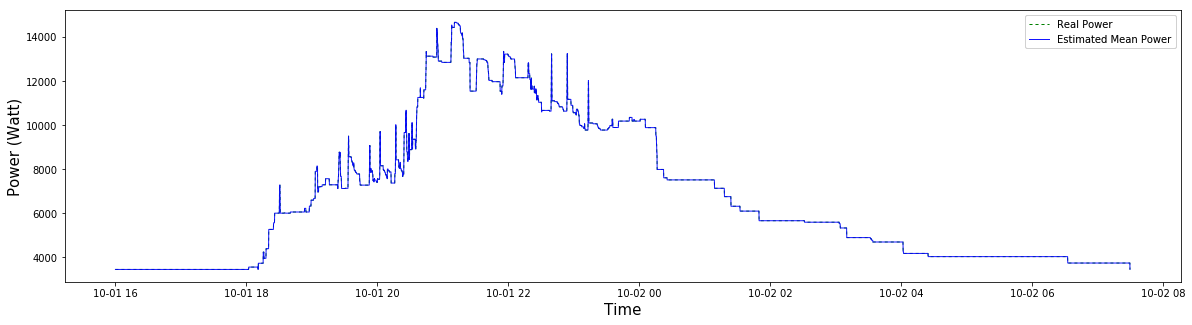

In [291]:
plot_line(data_dates=df['timestamp'], data_real=df_total_PCP3, data_approx=df_total_PCP3, days_interval=1)

In [296]:
#20141001-0800_20141001-1600
infile_evaluation = datadir + "integration/20141001-1600_20141001-2200/evaluate_pow450.csv"
data_real = pd.read_csv(infile_evaluation, index_col=0)
# clean node data if no jobs were executed on it
#min_consume = 60
df = data_real.drop('timestamp', axis=1)
#df = df.loc[:, (df.sum(axis=0) > min_consume*df.shape[0])]
df['timestamp'] = data_real['timestamp']
df['Total']= df.iloc[:, -63:-1].sum(axis=1)
print(df['Total'].max())
print(df['Total'].mean())
print(df['Total'].min())
df_total_500 = df['Total']
print("inizio {} fine {}".format(df['timestamp'].head(1), df['timestamp'].tail(1)))
print(len(df_total_500))

16170.364672564932
6812.396704519983
3451.4801852898636
inizio 0    2014-10-01 16:00:00
Name: timestamp, dtype: object fine 11156    2014-10-02 07:29:40
Name: timestamp, dtype: object
11157


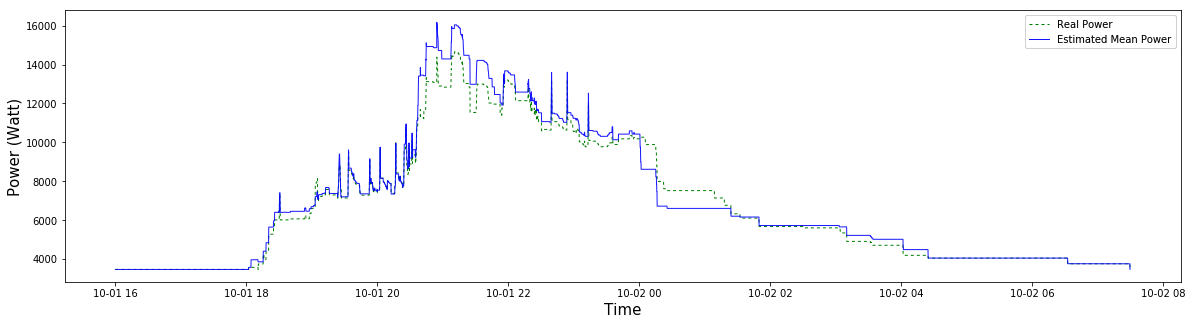

In [297]:
plot_line(data_dates=df['timestamp'], data_real=df_total_PCP3, data_approx=df_total_500, days_interval=1)

In [298]:
# quanto tempo il limite viene superato in assenza di vicoli?

minuti_sopra = df_total_PCP3[df_total_PCP3>14000].shape[0]*5/60
minuti_totali = df_total_PCP3.shape[0]*5/60

print("{} minuti su {} ore".format(minuti_sopra, minuti_totali/60))

10.5 minuti su 15.495833333333334 ore


In [299]:
# quanto tempo il limite viene superato in assenza di vicoli?

minuti_sopra = df_total_500[df_total_500>14000].shape[0]*5/60
minuti_totali = df_total_500.shape[0]*5/60

print("{} minuti su {} ore".format(minuti_sopra, minuti_totali/60))

50.666666666666664 minuti su 15.495833333333334 ore


[Text(0, 0, '2014-10-01 16:00:00'),
 Text(0, 0, '2014-10-01 18:46:40'),
 Text(0, 0, '2014-10-01 21:33:20'),
 Text(0, 0, '2014-10-02 00:20:00'),
 Text(0, 0, '2014-10-02 03:06:40'),
 Text(0, 0, '2014-10-02 05:53:20'),
 Text(0, 0, 'nan')]

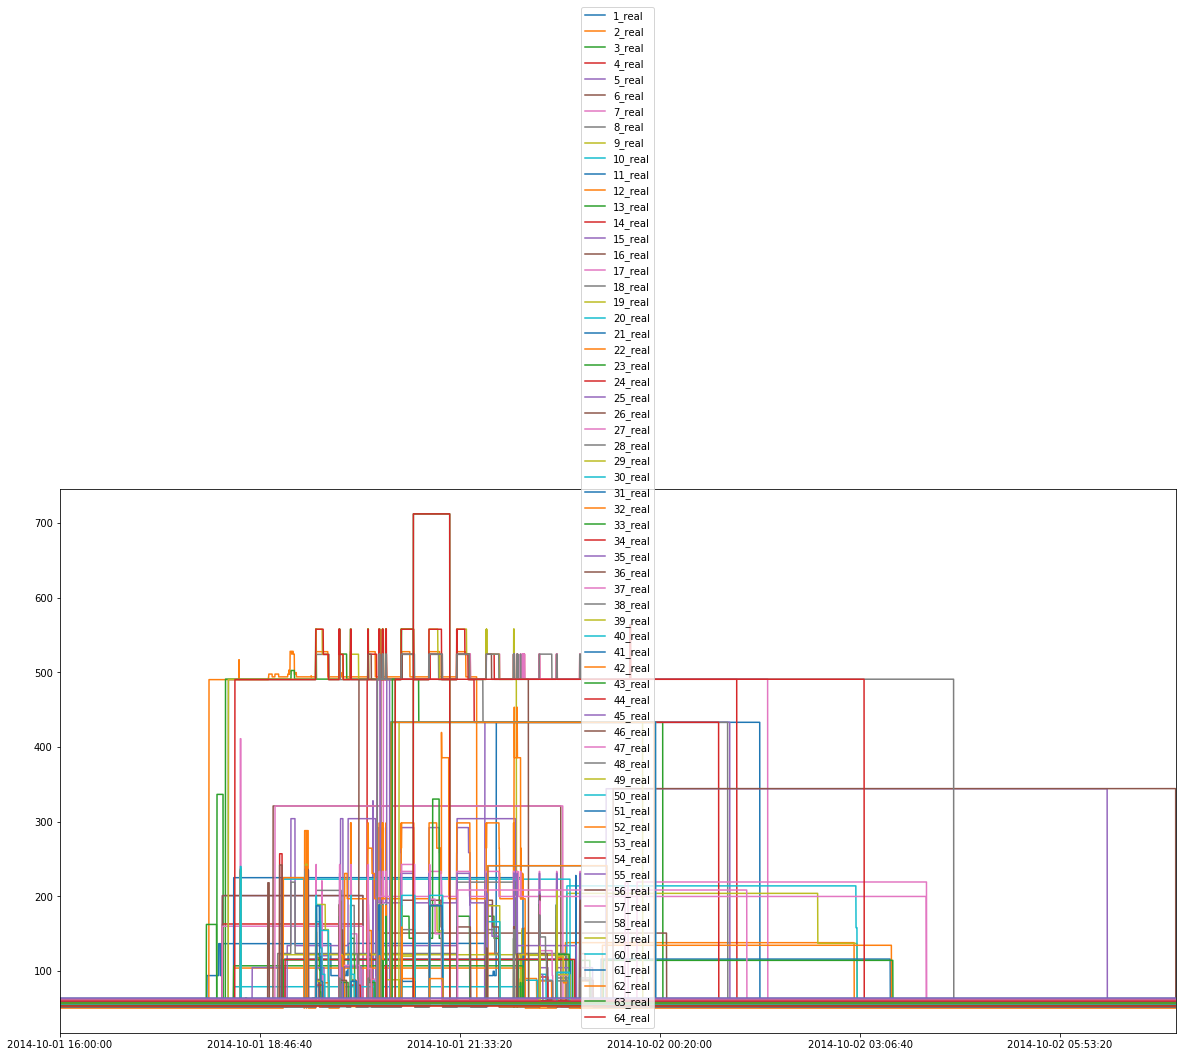

In [339]:
#20141001-0800_20141001-1600
infile_evaluation = datadir + "integration/20141001-1600_20141001-2200/evaluate_pow600.csv"
data_real_450 = pd.read_csv(infile_evaluation, index_col=0)
# clean node data if no jobs were executed on it
#min_consume = 60
df = data_real_450.drop('timestamp', axis=1)
#df = df.loc[:, (df.sum(axis=0) > min_consume*df.shape[0])]
df['timestamp'] = data_real_450['timestamp']
#df['Total']= df.iloc[:, -63:-1].sum(axis=1)
#print(df['Total'].max())
#print(df['Total'].mean())
#print(df['Total'].min())
#df_total_500 = df['Total']
df_total_600 = df.iloc[:, -63:-1].sum(axis=1)
#print("inizio {} fine {}".format(df['timestamp'].head(1), df['timestamp'].tail(1)))
#print(len(df_total_500))
fig, ax = plt.subplots(figsize=(20, 10))
df.plot(ax=ax)
tick_idx = plt.xticks()[0]
year_labels = df.timestamp[tick_idx].values
ax.xaxis.set_ticklabels(year_labels)

In [341]:
df['13_real'].mean()

83.88088796470906

[Text(0, 0, '2014-10-01 16:00:00'),
 Text(0, 0, '2014-10-01 18:46:40'),
 Text(0, 0, '2014-10-01 21:33:20'),
 Text(0, 0, '2014-10-02 00:20:00'),
 Text(0, 0, '2014-10-02 03:06:40'),
 Text(0, 0, '2014-10-02 05:53:20'),
 Text(0, 0, 'nan')]

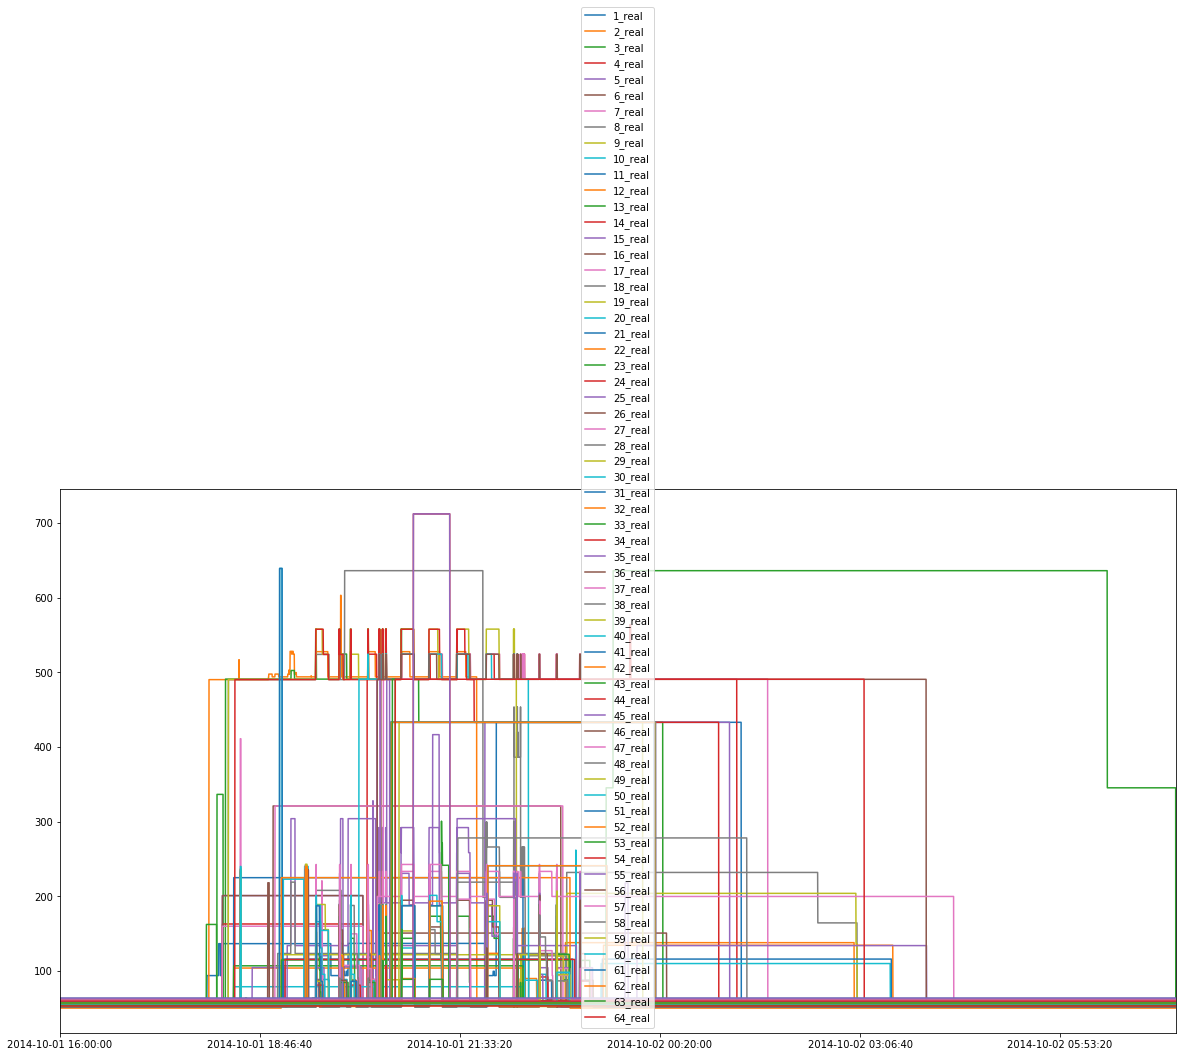

In [322]:
#20141001-0800_20141001-1600
infile_evaluation = datadir + "integration/20141001-1600_20141001-2200/evaluate_powPCP3.csv"
data_real_PCP3 = pd.read_csv(infile_evaluation, index_col=0)
# clean node data if no jobs were executed on it
#min_consume = 60
df = data_real_PCP3.drop('timestamp', axis=1)
#df = df.loc[:, (df.sum(axis=0) > min_consume*df.shape[0])]
df['timestamp'] = data_real_PCP3['timestamp']
#df['Total']= df.iloc[:, -63:-1].sum(axis=1)
#print(df['Total'].max())
#print(df['Total'].mean())
#print(df['Total'].min())
#df_total_500 = df['Total']
df_total_PCP3 = df.iloc[:, -63:-1].sum(axis=1)
#print("inizio {} fine {}".format(df['timestamp'].head(1), df['timestamp'].tail(1)))
#print(len(df_total_500))
fig, ax = plt.subplots(figsize=(20, 10))
df.plot(ax=ax)
tick_idx = plt.xticks()[0]
year_labels = df.timestamp[tick_idx].values
ax.xaxis.set_ticklabels(year_labels)

In [338]:
df['13_real'].max()

636.0

In [325]:
df['2_real'].max()

603.0

In [326]:
df['3_real'].max()

557.9168056491326

In [327]:
df['4_real'].max()

563.7899661666953

In [328]:
df['5_real'].max()

433.0

In [313]:
# differenze
diff = df_total_PCP3 - df_total_600
print(len(diff))
print(diff.max())
print(diff.min())

11157
784.0380994181205
-384.5516841158351


In [31]:
infile_evaluation = datadir + "integration/20141001-0800_20141001-1600/evaluate_powPCP3.csv"
data_real_PCP3 = pd.read_csv(infile_evaluation, index_col=0)
# clean node data if no jobs were executed on it
#min_consume = 60
df_PCP3 = data_real_PCP3.drop('timestamp', axis=1)
#df = df.loc[:, (df.sum(axis=0) > min_consume*df.shape[0])]
df_PCP3['timestamp'] = data_real_PCP3['timestamp']
df_PCP3['Total']= df_PCP3.iloc[:, -63:-1].sum(axis=1)
print(df_PCP3['Total'].max())
print(df_PCP3['Total'].mean())
print(df_PCP3['Total'].min())
df_total_PCP3 = df_PCP3['Total']
print("inizio {} fine {}".format(df_PCP3['timestamp'].head(1), df_PCP3['timestamp'].tail(1)))
print(len(df_total_PCP3))
len(df_PCP3['timestamp'])

10898.007764556723
5907.2982173487835
3451.4801852898636
inizio 0    2014-10-01 08:00:00
Name: timestamp, dtype: object fine 9968    2014-10-01 21:50:40
Name: timestamp, dtype: object
9969


9969

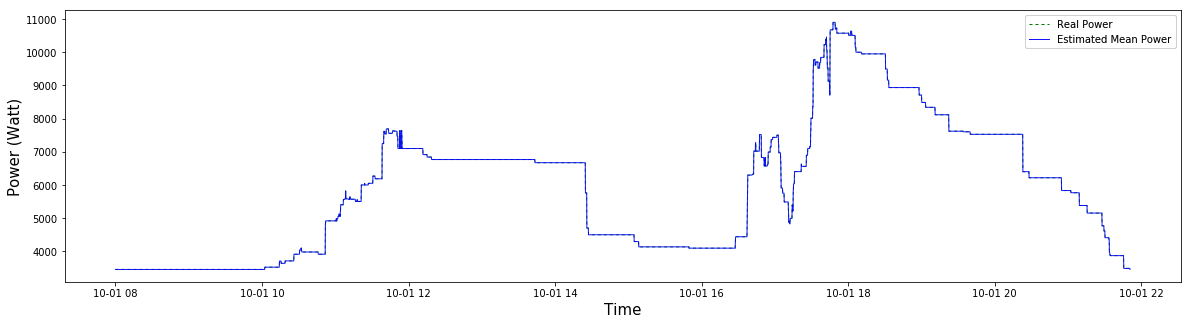

In [32]:
plot_line(data_dates=df_PCP3['timestamp'], data_real=df_total_PCP3, data_approx=df_total_PCP3, days_interval=1)

In [33]:
infile_evaluation = datadir + "integration/20141001-0800_20141001-1600/evaluate_pow7500.csv"
data_real_7500 = pd.read_csv(infile_evaluation, index_col=0)
# clean node data if no jobs were executed on it
#min_consume = 60
df_7500 = data_real_7500.drop('timestamp', axis=1)
#df = df.loc[:, (df.sum(axis=0) > min_consume*df.shape[0])]
df_7500['timestamp'] = data_real_7500['timestamp']
df_7500['Total']= df_7500.iloc[:, -63:-1].sum(axis=1)
print(df_7500['Total'].max())
print(df_7500['Total'].mean())
print(df_7500['Total'].min())
df_total_7500 = df_7500['Total']
print("inizio {} fine {}".format(df['timestamp'].head(1), df['timestamp'].tail(1)))
print(len(df_total_7500))
len(df_7500['timestamp'])

9318.453422133705
5720.984334120133
3451.4801852898636
inizio 0    2014-10-01 05:00:00
Name: timestamp, dtype: object fine 34775    2014-10-03 05:17:55
Name: timestamp, dtype: object
10453


10453

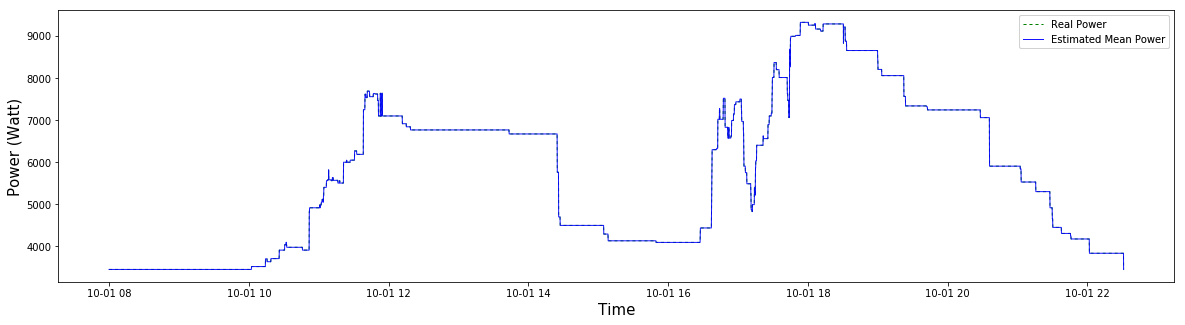

In [34]:
plot_line(data_dates=df_7500['timestamp'], data_real=df_total_7500, data_approx=df_total_7500, days_interval=1)

In [35]:
infile_evaluation = datadir + "integration/20141001-0800_20141001-1600/evaluate_pow9000.csv"
data_real_9000 = pd.read_csv(infile_evaluation, index_col=0)
# clean node data if no jobs were executed on it
#min_consume = 60
df_9000 = data_real_9000.drop('timestamp', axis=1)
#df = df.loc[:, (df.sum(axis=0) > min_consume*df.shape[0])]
df_9000['timestamp'] = data_real_9000['timestamp']
df_9000['Total']= df_9000.iloc[:, -63:-1].sum(axis=1)
print(df_9000['Total'].max())
print(df_9000['Total'].mean())
print(df_9000['Total'].min())
df_total_9000 = df_9000['Total']
print("inizio {} fine {}".format(df_9000['timestamp'].head(1), df_9000['timestamp'].tail(1)))
print(len(df_total_9000))
len(df_9000['timestamp'])

10276.539838717088
5896.122101840184
3451.4801852898636
inizio 0    2014-10-01 08:00:00
Name: timestamp, dtype: object fine 10011    2014-10-01 21:54:15
Name: timestamp, dtype: object
10012


10012

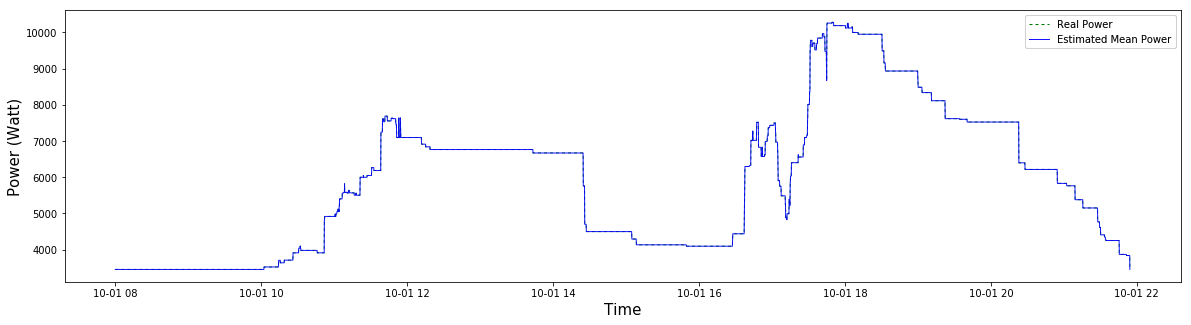

In [36]:
plot_line(data_dates=df_9000['timestamp'], data_real=df_total_9000, data_approx=df_total_9000, days_interval=1)

#20141001-0800_20141001-1600

In [258]:
#20141001-0800_20141001-1600
infile_evaluation = datadir + "integration/20141001-0800_20141001-1600/evaluate_pow.csv"
data_real = pd.read_csv(infile_evaluation, index_col=0)
# clean node data if no jobs were executed on it
#min_consume = 60
df = data_real.drop('timestamp', axis=1)
#df = df.loc[:, (df.sum(axis=0) > min_consume*df.shape[0])]
df['timestamp'] = data_real['timestamp']
df['Total']= df.iloc[:, -63:-1].sum(axis=1)
print(df['Total'].max())
print(df['Total'].mean())
print(df['Total'].min())
df_total_PCP3 = df['Total']
print("inizio {} fine {}".format(df['timestamp'].head(1), df['timestamp'].tail(1)))
print(len(df_total_PCP3))

10040.987506196067
5884.919817531257
3451.4801852898636
inizio 0    2014-10-01 08:00:00
Name: timestamp, dtype: object fine 10235    2014-10-01 22:12:55
Name: timestamp, dtype: object
10236


In [259]:
#20141001-0800_20141001-1600
infile_evaluation = datadir + "integration/20141001-0800_20141001-1600/evaluate_pow9000.csv"
data_real = pd.read_csv(infile_evaluation, index_col=0)
# clean node data if no jobs were executed on it
#min_consume = 60
df = data_real.drop('timestamp', axis=1)
#df = df.loc[:, (df.sum(axis=0) > min_consume*df.shape[0])]
df['timestamp'] = data_real['timestamp']
df['Total']= df.iloc[:, -63:-1].sum(axis=1)
print(df['Total'].max())
print(df['Total'].mean())
print(df['Total'].min())
df_total_9000 = df['Total']
print("inizio {} fine {}".format(df['timestamp'].head(1), df['timestamp'].tail(1)))
print(len(df_total_9000))

10276.539838717088
5896.122101840184
3451.4801852898636
inizio 0    2014-10-01 08:00:00
Name: timestamp, dtype: object fine 10011    2014-10-01 21:54:15
Name: timestamp, dtype: object
10012


In [260]:
df_total_PCP3 = df_total_PCP3[0:len(df_total_9000)]
print(len(df_total_PCP3))

10012


In [261]:
df_total_9000 = df_total_9000[0:len(df_total_PCP3)]
print(len(df_total_9000))

10012


In [262]:
df_timestamp = df['timestamp'][0:len(df_total_PCP3)]
print(len(df_timestamp))

10012


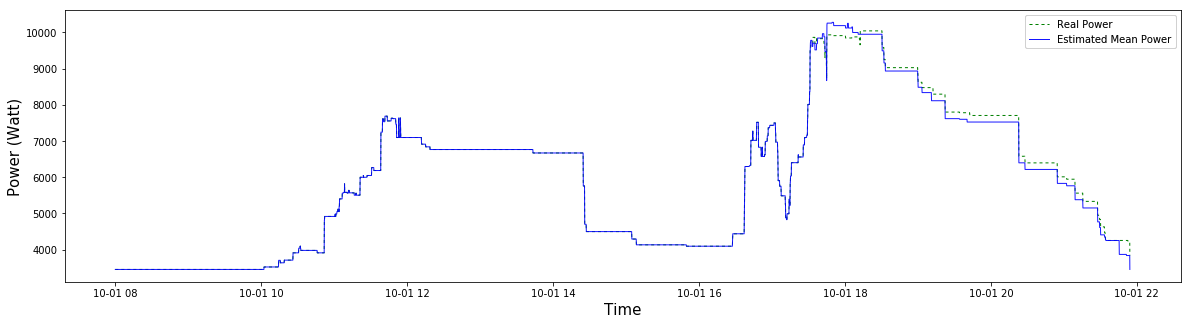

In [263]:
plot_line(data_dates=df_timestamp, data_real=df_total_PCP3, data_approx=df_total_9000, days_interval=1)

In [264]:
# quanto tempo il limite viene superato in assenza di vicoli?

minuti_sopra = df_total_PCP3[df_total_PCP3>9000].shape[0]*5/60
minuti_totali = df_total_PCP3.shape[0]*5/60

print("{} minuti su {} ore".format(minuti_sopra, minuti_totali/60))

88.5 minuti su 13.905555555555557 ore


In [267]:
# quanto tempo il limite viene superato in assenza di vicoli?

minuti_sopra = df_total_9000[df_total_9000>9000].shape[0]*5/60
minuti_totali = df_total_9000.shape[0]*5/60

print("{} minuti su {} ore".format(minuti_sopra, minuti_totali/60))

61.833333333333336 minuti su 13.905555555555557 ore


In [266]:
# quanto tempo il limite viene superato in assenza di vicoli?

minuti_sopra = df_total_PCP3[df_total_PCP3>9000].shape[0]*5/60
minuti_totali = df_total_PCP3.shape[0]*5/60

print("{} minuti su {} ore".format(minuti_sopra, minuti_totali/60))

88.5 minuti su 13.905555555555557 ore


In [ ]:
# quanto tempo il limite viene superato in assenza di vicoli?

minuti_sopra = df_total_PCP3[df_total_PCP3>9000].shape[0]*5/60
minuti_totali = df_total_PCP3.shape[0]*5/60

print("{} minuti su {} ore".format(minuti_sopra, minuti_totali/60))

In [268]:
# differenze
diff = df_total_PCP3 - df_total_9000
print(len(diff))
print(diff.max())
print(diff.min())

10012
416.13916541073195
-404.0284863461857


In [9]:
#data_real

In [10]:
# clean node data if no jobs were executed on it
min_consume = 60
df = data_real.drop('timestamp', axis=1)
df = df.loc[:, (df.sum(axis=0) > min_consume*df.shape[0])]
df['timestamp'] = data_real['timestamp']

In [143]:
#df

In [12]:
df['Total']= df.iloc[:, -63:-1].sum(axis=1)
#approx['Total']= approx.iloc[:, -63:-1].sum(axis=1)
#differences = real['Total'] - approx['Total']
#df = pd.DataFrame(differences)
#df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
#differences_norm = df['Total']

In [13]:
df['Total'].max()

28070.355545821378

In [14]:
df['Total'].mean()

10153.566113856223

In [255]:
infile_evaluation = datadir + "integration/20140930-0000_20141001-1700/evaluate_pow19000.csv"
data_real = pd.read_csv(infile_evaluation, index_col=0)
# clean node data if no jobs were executed on it
#min_consume = 60
df = data_real.drop('timestamp', axis=1)
#df = df.loc[:, (df.sum(axis=0) > min_consume*df.shape[0])]
df['timestamp'] = data_real['timestamp']
df['Total']= df.iloc[:, -63:-1].sum(axis=1)
print(df['Total'].max())
print(df['Total'].mean())
print(df['Total'].min())
evaluate_pow19000 = df['Total']
print("inizio {} fine {}".format(df['timestamp'].head(1), df['timestamp'].tail(1)))
print(len(evaluate_pow19000))

24226.680062682542
7077.422988796579
3451.4801852898636
inizio 0    2014-09-30 00:00:00
Name: timestamp, dtype: object fine 39542    2014-10-02 06:55:10
Name: timestamp, dtype: object
39543


In [242]:
# quanto tempo il limite viene superato in assenza di vicoli?

minuti_sopra = df_total_PCP3[df_total_PCP3>19000].shape[0]*5/60
minuti_totali = df_total_PCP3.shape[0]*5/60

print("{} minuti su {} ore".format(minuti_sopra, minuti_totali/60))

0.0 minuti su 54.920833333333334 ore


In [252]:
infile_evaluation = datadir + "integration/20140930-0000_20141001-1700/evaluate_pow19000_less.csv"
data_real = pd.read_csv(infile_evaluation, index_col=0)
# clean node data if no jobs were executed on it
#min_consume = 60
df = data_real.drop('timestamp', axis=1)
#df = df.loc[:, (df.sum(axis=0) > min_consume*df.shape[0])]
df['timestamp'] = data_real['timestamp']
df['Total']= df.iloc[:, -63:-1].sum(axis=1)
print(df['Total'].max())
print(df['Total'].mean())
print(df['Total'].min())
df_total_19000_less = df['Total']
print("inizio {} fine {}".format(df['timestamp'].head(1), df['timestamp'].tail(1)))
print(len(df_total_19000_less))

24226.680062682542
7077.422988796579
3451.4801852898636
inizio 0    2014-09-30 00:00:00
Name: timestamp, dtype: object fine 39542    2014-10-02 06:55:10
Name: timestamp, dtype: object
39543


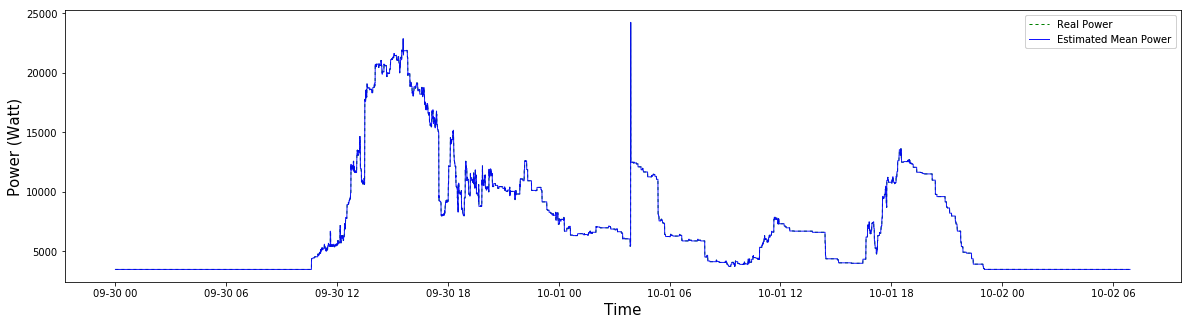

In [256]:
plot_line(data_dates=df['timestamp'], data_real=evaluate_pow19000, data_approx=df_total_19000_less, days_interval=1)

In [194]:
infile_evaluation = datadir + "integration/20140930-0000_20141001-1700/evaluate_pow.csv"
data_real = pd.read_csv(infile_evaluation, index_col=0)
# clean node data if no jobs were executed on it
#min_consume = 60
df = data_real.drop('timestamp', axis=1)
#df = df.loc[:, (df.sum(axis=0) > min_consume*df.shape[0])]
df['timestamp'] = data_real['timestamp']
df['Total']= df.iloc[:, -63:-1].sum(axis=1)
print(df['Total'].max())
print(df['Total'].mean())
print(df['Total'].min())
df_total_19000 = df['Total']
print("inizio {} fine {}".format(df['timestamp'].head(1), df['timestamp'].tail(1)))

24226.680062682542
7077.422988796579
3451.4801852898636
inizio 0    2014-09-30 00:00:00
Name: timestamp, dtype: object fine 39542    2014-10-02 06:55:10
Name: timestamp, dtype: object


In [193]:
# differenze
diff = df_total_PCP3 - df_total_19000
print(len(diff))
print(diff.max())
print(diff.min())

39543
20317.58051740221
0.0


In [269]:
infile_evaluation = datadir + "integration/20141001-0000_20141010-0000/evaluate_powPCP3_app.csv"
data_real = pd.read_csv(infile_evaluation, index_col=0)
# clean node data if no jobs were executed on it
#min_consume = 60
df = data_real.drop('timestamp', axis=1)
#df = df.loc[:, (df.sum(axis=0) > min_consume*df.shape[0])]
df['timestamp'] = data_real['timestamp']
df['Total']= df.iloc[:, -63:-1].sum(axis=1)
print(df['Total'].max())
print(df['Total'].mean())
print(df['Total'].min())
df_total_PCP3 = df['Total']
print("inizio {} fine {}".format(df['timestamp'].head(1), df['timestamp'].tail(1)))

21831.61952613777
4591.157034894578
3451.4801852898636
inizio 0    2014-10-01 00:00:00
Name: timestamp, dtype: object fine 496114    2014-10-29 17:02:50
Name: timestamp, dtype: object


In [270]:
infile_evaluation = datadir + "integration/20141001-0000_20141010-0000/evaluate_pow22750_approx.csv"
data_real = pd.read_csv(infile_evaluation, index_col=0)
# clean node data if no jobs were executed on it
#min_consume = 60
df = data_real.drop('timestamp', axis=1)
#df = df.loc[:, (df.sum(axis=0) > min_consume*df.shape[0])]
df['timestamp'] = data_real['timestamp']
df['Total']= df.iloc[:, -63:-1].sum(axis=1)
print(df['Total'].max())
print(df['Total'].mean())
print(df['Total'].min())
df_total_22750 = df['Total']
print("inizio {} fine {}".format(df['timestamp'].head(1), df['timestamp'].tail(1)))

21831.61952613777
8860.69750957643
3451.4801852898636
inizio 0    2014-10-01 00:00:00
Name: timestamp, dtype: object fine 102263    2014-10-06 22:01:55
Name: timestamp, dtype: object


In [271]:
len(df_total_PCP3)

496115

In [272]:
len(df_total_22750)

102264

In [273]:
df_total_PCP3 = df_total_22750[0:len(df_total_22750)]
print(len(df_total_PCP3))

102264


In [274]:
df_timestamp = df['timestamp'][0:len(df_total_PCP3)]
print(len(df_timestamp))

102264


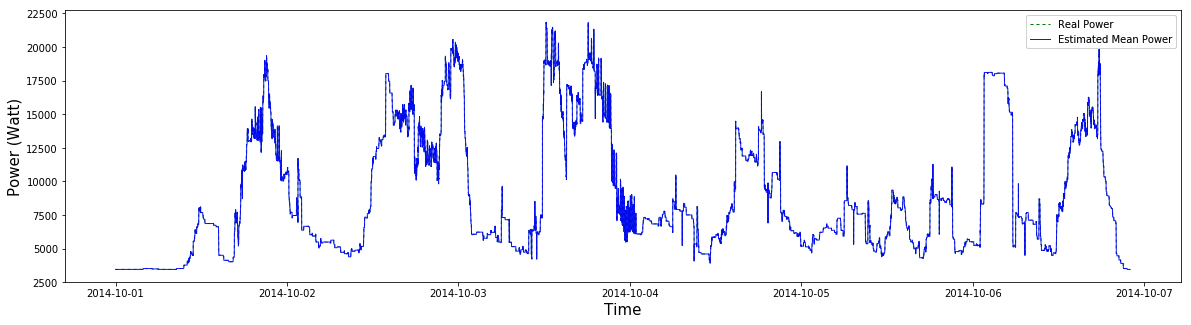

In [275]:
plot_line(data_dates=df_timestamp, data_real=df_total_PCP3, data_approx=df_total_22750, days_interval=1)

In [201]:
# quanto tempo il limite viene superato in assenza di vicoli?

minuti_sopra = df_total_PCP3[df_total_PCP3>22750].shape[0]*5/60
minuti_totali = df_total_PCP3.shape[0]*5/60

print("{} minuti su {} ore".format(minuti_sopra, minuti_totali/60))

0.0 minuti su 142.03333333333333 ore


In [202]:
# quanto tempo il limite viene superato in assenza di vicoli?

minuti_sopra = df_total_22750[df_total_22750>22750].shape[0]*5/60
minuti_totali = df_total_22750.shape[0]*5/60

print("{} minuti su {} ore".format(minuti_sopra, minuti_totali/60))

0.0 minuti su 142.03333333333333 ore


In [203]:
# massimi
print(df_total_PCP3.max())
print(df_total_22750.max())

21831.61952613777
21831.61952613777


In [204]:
# differenze
diff = df_total_PCP3 - df_total_22750
print(len(diff))
print(diff.max())
print(diff.min())

102264
0.0
0.0


In [169]:
diff.mean()

4.181153186460674

In [60]:
df_total_PCP3.shape

(60129,)

In [62]:
df_total_22750.shape

(45957,)

In [22]:
diff = df_total_PCP3 - df_total_22750
diff.max()

11454.878988357246

In [34]:
df_total_PCP3.shape[0]*5/60

5010.75

In [29]:
df_total_PCP3[df_total_PCP3>22750].shape[0]*5/60

46.166666666666664

In [32]:
60129*5/60/60/24

3.4796875000000003

In [35]:
46 / 5010

0.009181636726546906

In [36]:
diff.shape[0]

60129

In [37]:
diff[diff>0].shape[0]

2849

In [42]:
diff_not_zero = diff[diff != 0]

In [43]:
diff_not_zero.mean()

4177.588142356007

In [45]:
4177 / 60129

0.06946731194598281

In [46]:
500/4177

0.11970313622216902

[Text(0, 0, '2014-10-01 08:00:00'),
 Text(0, 0, '2014-10-01 10:46:40'),
 Text(0, 0, '2014-10-01 13:33:20'),
 Text(0, 0, '2014-10-01 16:20:00'),
 Text(0, 0, '2014-10-01 19:06:40'),
 Text(0, 0, 'nan')]

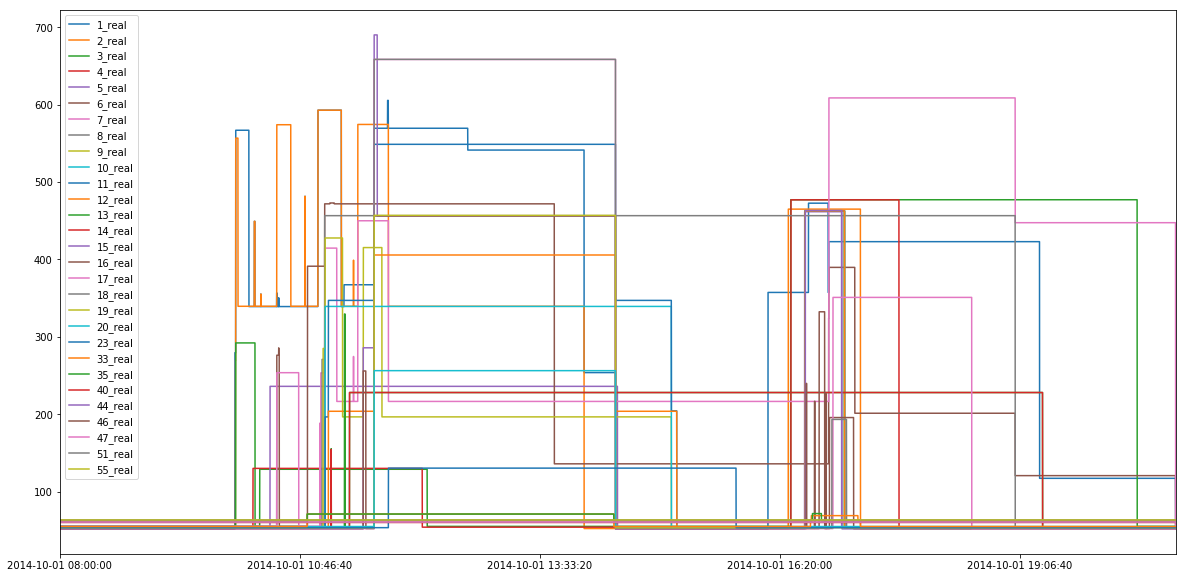

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))
df.plot(ax=ax)
tick_idx = plt.xticks()[0]
year_labels = df.timestamp[tick_idx].values
ax.xaxis.set_ticklabels(year_labels)

In [7]:
infile_evaluation = datadir + "integration/20141001-0500_20141002-2200/evaluate_pow.csv"
data_real_19000 = pd.read_csv(infile_evaluation, index_col=0)
# clean node data if no jobs were executed on it
#min_consume = 60
df_19000 = data_real_19000.drop('timestamp', axis=1)
#df = df.loc[:, (df.sum(axis=0) > min_consume*df.shape[0])]
df_19000['timestamp'] = data_real_19000['timestamp']
df_19000['Total']= df.iloc[:, -63:-1].sum(axis=1)
print(df_19000['Total'].max())
print(df_19000['Total'].mean())
print(df_19000['Total'].min())
df_total_19000 = df_19000['Total']
print("inizio {} fine {}".format(df_19000['timestamp'].head(1), df_19000['timestamp'].tail(1)))

19928.74539381588
8889.354861052418
3396.1457400968025
inizio 0    2014-10-01 05:00:00
Name: timestamp, dtype: object fine 34775    2014-10-03 05:17:55
Name: timestamp, dtype: object


In [9]:
infile_evaluation = datadir + "integration/20141001-0500_20141002-2200/evaluate_powPCP3.csv"
data_real_pcp3 = pd.read_csv(infile_evaluation, index_col=0)
# clean node data if no jobs were executed on it
#min_consume = 60
df_pcp3 = data_real_pcp3.drop('timestamp', axis=1)
#df = df.loc[:, (df.sum(axis=0) > min_consume*df.shape[0])]
df_pcp3['timestamp'] = data_real_pcp3['timestamp']
df_pcp3['Total']= df_pcp3.iloc[:, -63:-1].sum(axis=1)
print(df_pcp3['Total'].max())
print(df_pcp3['Total'].mean())
print(df_pcp3['Total'].min())
df_total_PCP3 = df_pcp3['Total']
print("inizio {} fine {}".format(df_pcp3['timestamp'].head(1), df_pcp3['timestamp'].tail(1)))

20686.83335479277
9104.532560091347
3451.4801852898636
inizio 0    2014-10-01 05:00:00
Name: timestamp, dtype: object fine 34775    2014-10-03 05:17:55
Name: timestamp, dtype: object


/usr/local/lib/python3.5/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


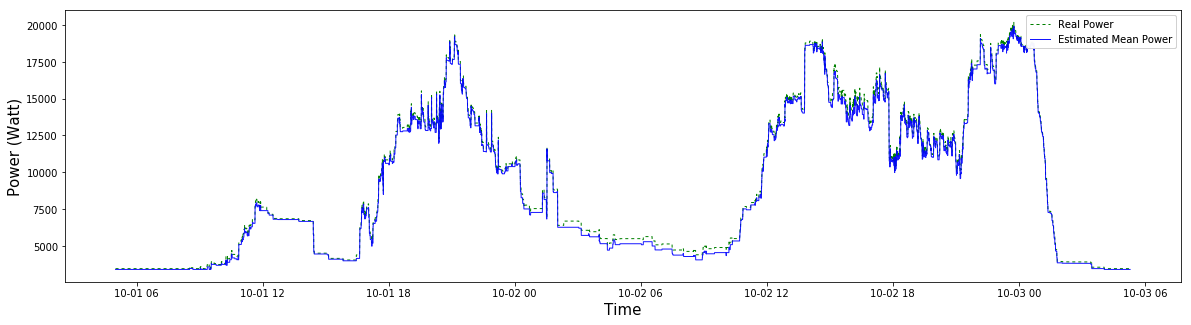

In [8]:
df_timestamp = df_pcp3['timestamp']
plot_line(data_dates=df_timestamp, data_real=df_total_PCP3, data_approx=df_total_19000, days_interval=1)

In [17]:
# quanto tempo il limite viene superato in assenza di vicoli?

minuti_sopra = df_total_PCP3[df_total_PCP3>19000].shape[0]*5/60
minuti_totali = df_total_PCP3.shape[0]*5/60

print("{} minuti su {} ore".format(minuti_sopra, minuti_totali/60))

75.5 minuti su 48.3 ore


In [15]:
# quanto tempo il limite viene superato in assenza di vicoli?

minuti_sopra = df_total_19000[df_total_19000>20000].shape[0]*5/60
minuti_totali = df_total_19000.shape[0]*5/60

print("{} minuti su {} ore".format(minuti_sopra, minuti_totali/60))

0.0 minuti su 48.3 ore
